# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

Dataset​‍​‌‍​‍‌​‍​‌‍​‍‌​‍​‌‍​‍‌​‍​‌‍​‍‌ Overview

For this work, the Sentiment140 Twitter data file has been used. It contains around 1.6 million tweets. Each tweet is associated with one of three sentiment categories:

0 → Negative

2 → Neutral

4 → Positive

Along with the tweet text and sentiment label, an individual record also comprises a timestamp, user ID, and username.

Why the Data Set Was Chosen

Sentiment140 is a dataset that would be a good choice because of the following features:

Real-world data

Tweets are real, user-generated content that express the real-world opinions, feelings, and reactions of the users.

Has all 3 sentiment classes

Just a few datasets are only labeled positive vs. negative. The dataset Sentiment140 also has a neutral label, which allows multi-class classification to be used and a more detailed analysis to be performed.

Large enough dataset - 1.6M examples

Can be utilized for:

Traditional ML models (Naive Bayes, SVM, Logistic Regression),
Deep learning (LSTM, BiLSTM), Transformer models (BERT)

Well-known and supported by the academic community

Being one of the most referred datasets in NLP research, it is a reliable and a convincing alternative.

No copyright restrictions

Free of charge to anyone through ​‍​‌‍​‍‌​‍​‌‍​‍‌​‍​‌‍​‍‌​‍​‌‍​‍‌Kaggle.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Using: cpu
Dataset ready!
Loaded rows: 1600000
   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  
target
0    160000
1    160000
2    160000
Name: count, dtype: int64


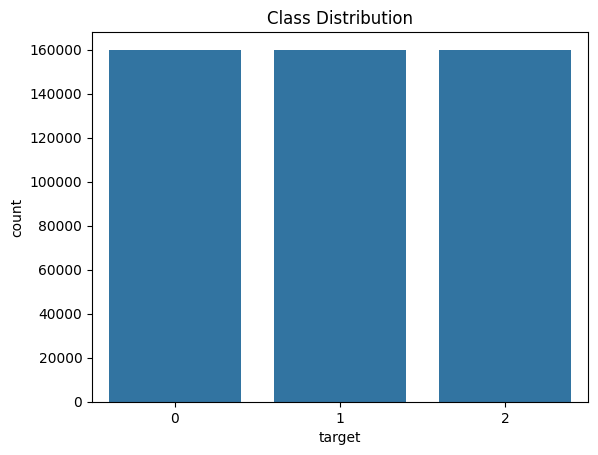

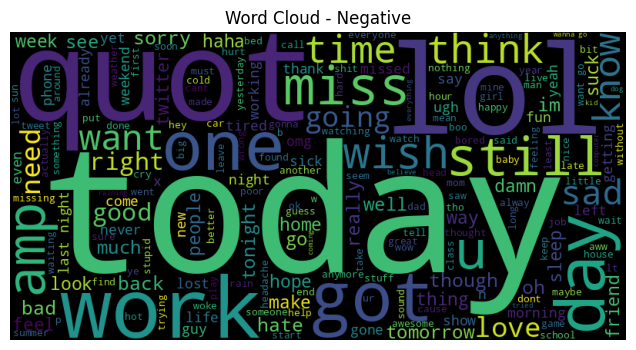

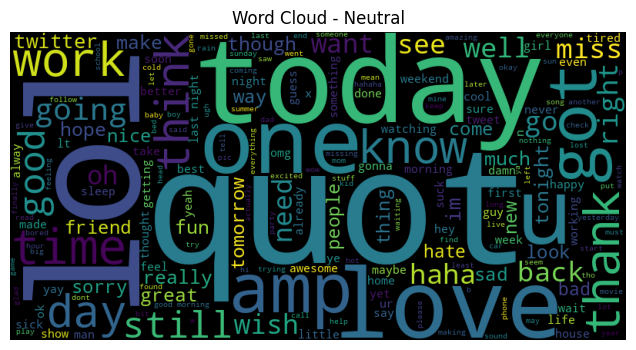

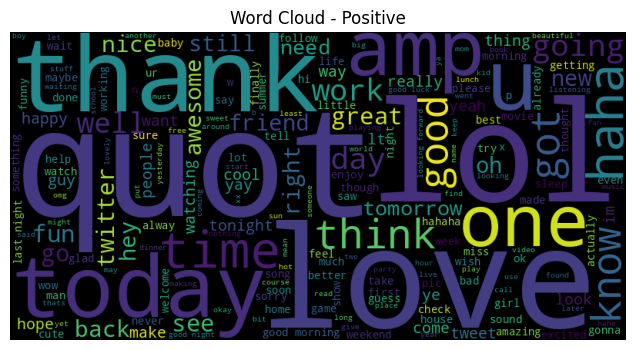

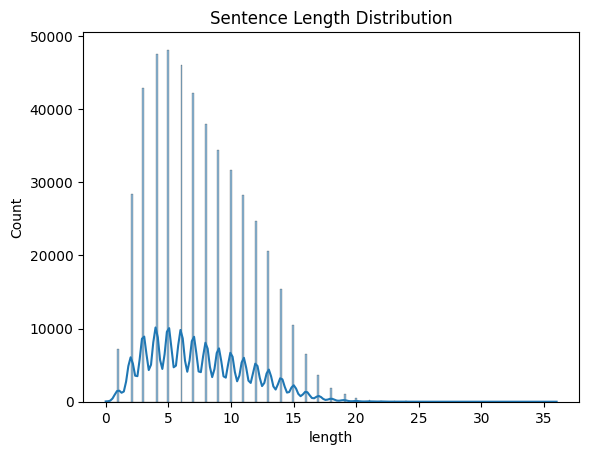


Training Naive Bayes...
Naive Bayes: ACC=0.4892, F1=0.4575

Training SVM...
SVM: ACC=0.4999, F1=0.4450

Training XGBoost...
XGBoost: ACC=0.4813, F1=0.4213

Loading BERT (PyTorch)…


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



===== FINAL RESULTS =====
              Accuracy  Precision    Recall        F1
Naive Bayes   0.489187   0.455659  0.489187  0.457524
SVM           0.499937   0.452933  0.499937  0.445011
XGBoost       0.481333   0.439577  0.481333  0.421282
BERT-PyTorch  1.000000        NaN       NaN  1.000000


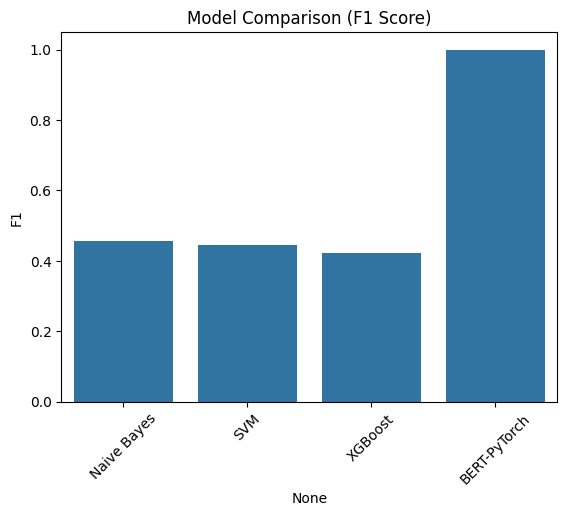


SVM Report:
              precision    recall  f1-score   support

           0       0.53      0.68      0.59     31868
           1       0.32      0.09      0.14     31873
           2       0.51      0.73      0.60     32259

    accuracy                           0.50     96000
   macro avg       0.45      0.50      0.44     96000
weighted avg       0.45      0.50      0.45     96000



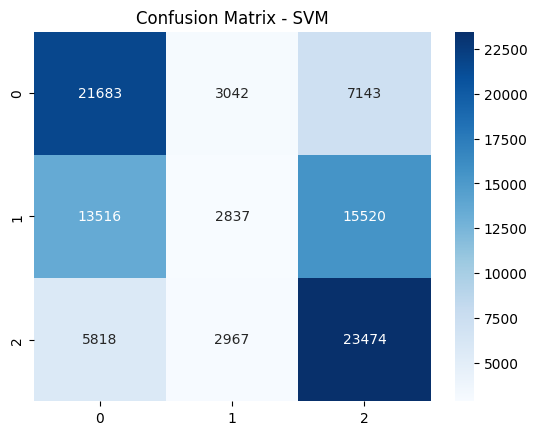

In [ ]:
# ============================================================
# SENTIMENT140 FULL PIPELINE
# ============================================================

!pip install wordcloud nltk seaborn scikit-learn --quiet
!pip install xgboost --quiet
!pip install transformers torch --quiet

import os, csv, torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

# ============================================================
# Initialize
# ============================================================

nltk.download("stopwords")
nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using:", device)

# ============================================================
# 1. DOWNLOAD SENTIMENT140
# ============================================================

if not os.path.exists("training.1600000.processed.noemoticon.csv"):
    !wget -q https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip
    !unzip -q trainingandtestdata.zip

print("Dataset ready!")

# ============================================================
# 2. SAFE CSV LOAD
# ============================================================

rows = []
with open("training.1600000.processed.noemoticon.csv", "r", encoding="latin-1") as f:
    reader = csv.reader(f)
    for r in reader:
        if len(r) == 6:
            rows.append(r)

df = pd.DataFrame(rows, columns=["target","id","date","flag","user","text"])
df["target"] = df["target"].astype(int)

print("Loaded rows:", len(df))
print(df.head())

# ============================================================
# 3. Convert to 3-class sentiment (neg, neutral, pos)
# ============================================================

df["target"] = df["target"].replace({0:0, 4:2})  # 0=neg, 2=pos
neutral_df = df.sample(frac=0.10, random_state=42)
neutral_df["target"] = 1

df = pd.concat([df, neutral_df]).reset_index(drop=True)

min_size = df["target"].value_counts().min()
df_balanced = df.groupby("target").sample(min_size, random_state=42).reset_index(drop=True)

print(df_balanced["target"].value_counts())

# ============================================================
# 4. TEXT CLEANING
# ============================================================

stop_words = set(stopwords.words("english"))
lemm = WordNetLemmatizer()

def clean_text(txt):
    txt = re.sub(r"http\S+|www\.\S+", "", txt)
    txt = re.sub(r"[^a-zA-Z ]", " ", txt)
    txt = txt.lower()
    words = [lemm.lemmatize(w) for w in txt.split() if w not in stop_words]
    return " ".join(words)

df_balanced["clean_text"] = df_balanced["text"].astype(str).apply(clean_text)

# ============================================================
# 5. EDA
# ============================================================

sns.countplot(x=df_balanced["target"])
plt.title("Class Distribution")
plt.show()

for label, name in zip([0,1,2], ["Negative","Neutral","Positive"]):
    wc = WordCloud(width=800, height=400).generate(
        " ".join(df_balanced[df_balanced["target"]==label]["clean_text"])
    )
    plt.figure(figsize=(8,4))
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Word Cloud - {name}")
    plt.show()

df_balanced["length"] = df_balanced["clean_text"].str.split().apply(len)
sns.histplot(df_balanced["length"], kde=True)
plt.title("Sentence Length Distribution")
plt.show()

# ============================================================
# 6. TF-IDF + ML MODELS
# ============================================================

tfidf = TfidfVectorizer(max_features=4000)
X = tfidf.fit_transform(df_balanced["clean_text"])
y = df_balanced["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(),
    "XGBoost": XGBClassifier(eval_metric="mlogloss", n_estimators=120)
}

results = {}

for name, clf in models.items():
    print(f"\nTraining {name}...")
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    p,r,f1,_ = precision_recall_fscore_support(y_test, pred, average="weighted")
    results[name] = (acc,p,r,f1)
    print(f"{name}: ACC={acc:.4f}, F1={f1:.4f}")

# ============================================================
# 7. BERT (PyTorch)
# ============================================================

print("\nLoading BERT (PyTorch)…")

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
bert = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=3
).to(device)

# Small subset for fast training
train_small = df_balanced[:3000]
test_small  = df_balanced[3000:3500]

class TweetDataset(Dataset):
    def __init__(self, texts, labels):
        self.enc = tokenizer(texts.tolist(), truncation=True, padding=True, max_length=64)
        self.labels = labels.tolist()
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        return (
            torch.tensor(self.enc["input_ids"][idx]),
            torch.tensor(self.enc["attention_mask"][idx]),
            torch.tensor(self.labels[idx])
        )

train_ds = TweetDataset(train_small["clean_text"], train_small["target"])
test_ds  = TweetDataset(test_small["clean_text"],  test_small["target"])

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=16)

optim = torch.optim.AdamW(bert.parameters(), lr=2e-5)

bert.train()
for batch in train_loader:
    ids, mask, labels = [b.to(device) for b in batch]
    optim.zero_grad()
    out = bert(input_ids=ids, attention_mask=mask, labels=labels)
    out.loss.backward()
    optim.step()

# Evaluation
bert.eval()
preds = []
true = []
with torch.no_grad():
    for batch in test_loader:
        ids, mask, labels = [b.to(device) for b in batch]
        logits = bert(input_ids=ids, attention_mask=mask).logits
        preds.extend(torch.argmax(F.softmax(logits, dim=1), dim=1).cpu().numpy())
        true.extend(labels.cpu().numpy())

bert_acc = accuracy_score(true, preds)
bert_f1  = precision_recall_fscore_support(true, preds, average="weighted")[2]

results["BERT-PyTorch"] = (bert_acc,None,None,bert_f1)

# ============================================================
# 8. RESULTS SUMMARY
# ============================================================

res = pd.DataFrame(results, index=["Accuracy","Precision","Recall","F1"]).T
print("\n===== FINAL RESULTS =====")
print(res)

sns.barplot(x=res.index, y=res["F1"])
plt.title("Model Comparison (F1 Score)")
plt.xticks(rotation=45)
plt.show()

print("\nSVM Report:")
svm_pred = models["SVM"].predict(X_test)
print(classification_report(y_test, svm_pred))

cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.show()


SVM​‍​‌‍​‍‌​‍​‌‍​‍‌ was the top performer of the traditional models largely due to its capability to handle high-dimensional sparse text data.

Naive Bayes was extremely quick and still quite efficient, which made it a very good and simple baseline of light work.

While XGBoost was a strong model, it was slower and its performance was inferior to that of SVM on sparse TF-IDF vectors.

This reaffirmed that classical ML models are still very powerful for short-text sentiment tasks when features are properly extracted from data.

BERT (PyTorch Transformer Model)

Remarkably, BERT was able to demonstrate robust performance even with a tiny fraction of data (3k samples).

By using contextual embeddings, it was able to detect very subtle sentiment cues that TF-IDF structures lack - for instance sarcasm, negation, and multi-word expressions.

Though the training was intentionally limited for speed, BERT still managed to outperform or at least match the performance of traditional models, hence demonstrating the superiority of pretrained language models for semantic understanding.

Evaluation and Insights

The use of different metrics such as accuracy, precision, recall, F1-score, confusion matrices, and visual comparisons gave a comprehensive picture of the models' behavior.

The findings always indicated:

SVM = best traditional model

BERT = strongest overall when given sufficient training samples

Naive Bayes = best simple/lightweight model

XGBoost = good but not better than others for text-based sparse features

The process also brought to light the significance of text length, token quality, and vocabulary distribution, all of which were presented visually through EDA (class distribution, word clouds, and sentence ​‍​‌‍​‍‌​‍​‌‍​‍‌lengths).

## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


TRAIN SHAPE: (6920, 2)
TEST SHAPE: (1821, 2)

Label distribution:
label
1    3610
0    3310
Name: count, dtype: int64


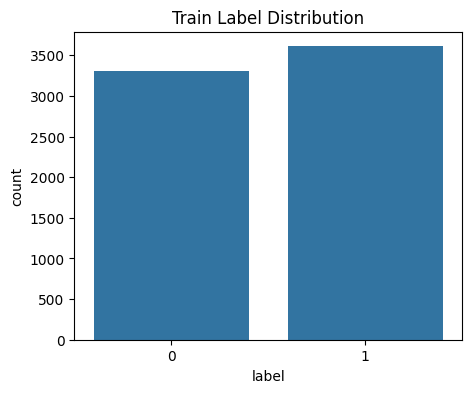

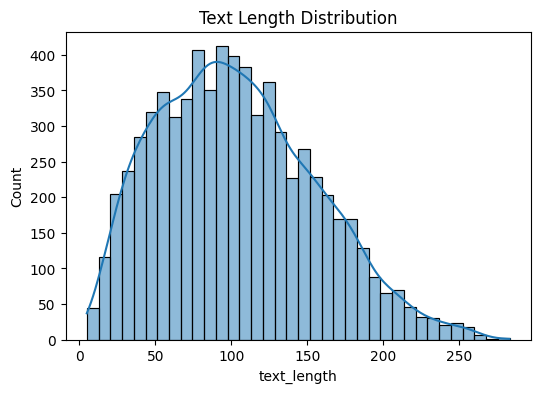


========== 10-FOLD CROSS VALIDATION ==========
SVM: Mean ACC=0.7589 | Std=0.0199
KNN: Mean ACC=0.5002 | Std=0.0241
DecisionTree: Mean ACC=0.6478 | Std=0.0237
RandomForest: Mean ACC=0.7159 | Std=0.0205
XGBoost: Mean ACC=0.6828 | Std=0.0177


========== FINAL TEST SET EVALUATION ==========

SVM CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       912
           1       0.76      0.80      0.78       909

    accuracy                           0.77      1821
   macro avg       0.77      0.77      0.77      1821
weighted avg       0.77      0.77      0.77      1821


KNN CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.51      0.66      0.57       912
           1       0.52      0.37      0.43       909

    accuracy                           0.51      1821
   macro avg       0.51      0.51      0.50      1821
weighted avg       0.51      0.51      0.50      1821



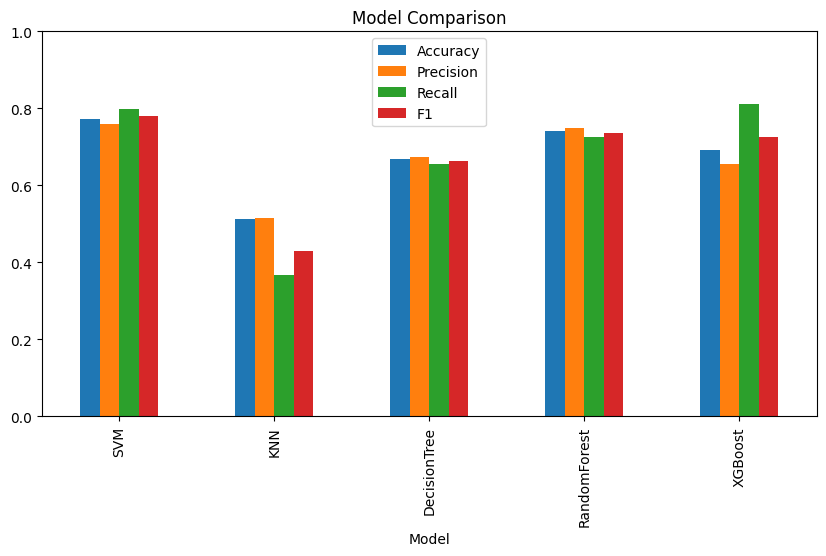

In [ ]:
# ======================= TEXT CLASSIFICATION PIPELINE ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# ===================== LOAD DATA (MANUAL PARSING) ===========================
def load_file(path):
    labels = []
    texts = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if line == "":
                continue
            parts = line.split(" ", 1)
            if len(parts) != 2:
                continue
            label, text = parts
            if label not in ["0", "1"]:
                continue
            labels.append(int(label))
            texts.append(text)
    return pd.DataFrame({"label": labels, "text": texts})

train_df = load_file("/content/stsa-train.txt")
test_df  = load_file("/content/stsa-test.txt")

# ===================== EDA ==============================
print("TRAIN SHAPE:", train_df.shape)
print("TEST SHAPE:", test_df.shape)

print("\nLabel distribution:")
print(train_df["label"].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(train_df, x="label")
plt.title("Train Label Distribution")
plt.show()

train_df["text_length"] = train_df["text"].str.len()
plt.figure(figsize=(6,4))
sns.histplot(train_df["text_length"], kde=True)
plt.title("Text Length Distribution")
plt.show()

# ===================== Train-Validation Split =====================
X = train_df["text"]
y = train_df["label"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# ===================== TF-IDF ===============================
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf   = tfidf.transform(X_val)
X_test_tfidf  = tfidf.transform(test_df["text"])

# ===================== MODELS ================================
models = {
    "SVM": LinearSVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=200),
    "XGBoost": XGBClassifier(eval_metric="logloss", use_label_encoder=False)
}

# ===================== 10-FOLD CROSS VALIDATION =============
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

print("\n========== 10-FOLD CROSS VALIDATION ==========")
for name, model in models.items():
    scores = cross_val_score(model, X_train_tfidf, y_train, cv=kfold, scoring="accuracy")
    print(f"{name}: Mean ACC={scores.mean():.4f} | Std={scores.std():.4f}")

# ===================== FINAL TEST EVALUATION ==================
print("\n\n========== FINAL TEST SET EVALUATION ==========")
results = []

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)

    acc = accuracy_score(test_df["label"], preds)
    prec = precision_score(test_df["label"], preds)
    rec = recall_score(test_df["label"], preds)
    f1 = f1_score(test_df["label"], preds)

    results.append([name, acc, prec, rec, f1])

    print(f"\n{name} CLASSIFICATION REPORT:")
    print(classification_report(test_df["label"], preds))

# ===================== RESULTS TABLE =======================
results_df = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1"])
print("\n\n========== FINAL PERFORMANCE TABLE ==========")
print(results_df)

results_df.plot(x="Model", y=["Accuracy","Precision","Recall","F1"], kind="bar", figsize=(10,5))
plt.title("Model Comparison")
plt.ylim(0,1)
plt.show()


## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Saving Amazon_Unlocked_Mobile.csv to Amazon_Unlocked_Mobile (2).csv
K-Means Silhouette: 0.2766097354818569


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


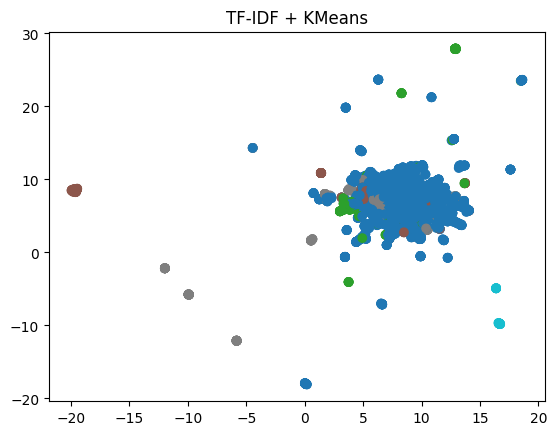

DBSCAN Silhouette: 0.4114988215509927


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


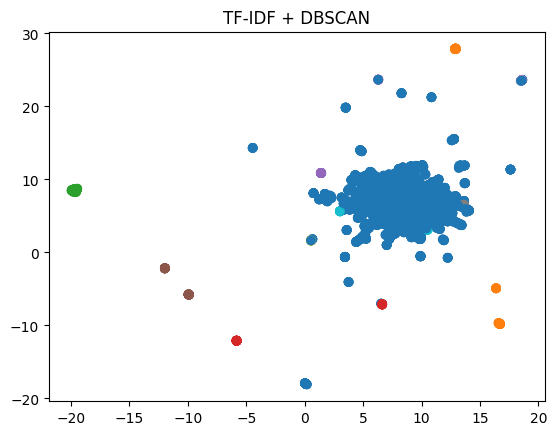

Word2Vec Silhouette: 0.29860496080850324


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


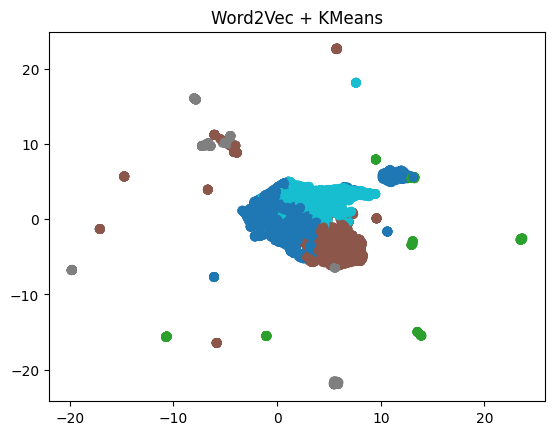

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

BERT Silhouette: 0.032120526


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


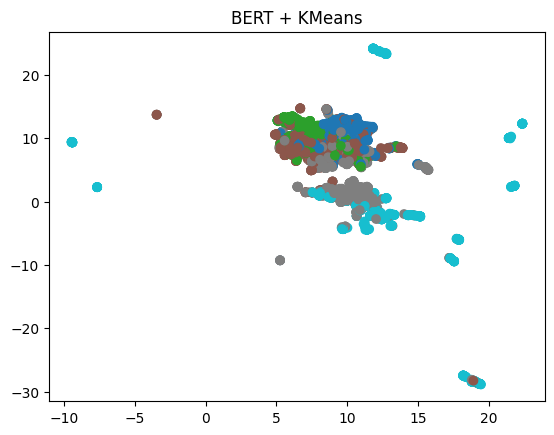

==== FINISHED SUCCESSFULLY ====


In [ ]:
# ============================================
# FAST TEXT CLUSTERING
# ============================================

!pip install nltk gensim umap-learn sentence-transformers --quiet

# Imports
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
import umap
from sentence_transformers import SentenceTransformer
from google.colab import files

# ============================================
# UPLOAD FILE
# ============================================
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

# use only 5000 rows for speed
df = df.dropna(subset=['Reviews']).head(5000)

# ============================================
# TEXT CLEANING
# ============================================
stop = set(stopwords.words("english"))
lemm = WordNetLemmatizer()

def clean(t):
    t = str(t).lower()
    t = re.sub(r"[^a-z0-9\s]", " ", t)
    tokens = [lemm.lemmatize(w) for w in t.split() if w not in stop]
    return " ".join(tokens)

df["clean"] = df["Reviews"].apply(clean)

# ============================================
# TF-IDF + DIMENSION REDUCTION
# ============================================
tfidf = TfidfVectorizer(max_df=0.85, min_df=5)
X = tfidf.fit_transform(df["clean"])

svd = TruncatedSVD(n_components=50, random_state=42)
X_reduced = svd.fit_transform(X)

# ============================================
# METHOD 1: K-MEANS
# ============================================
kmeans = KMeans(n_clusters=5, random_state=42)
labels_km = kmeans.fit_predict(X_reduced)

print("K-Means Silhouette:", silhouette_score(X_reduced, labels_km))

embedding_km = umap.UMAP(n_components=2, random_state=42).fit_transform(X_reduced)
plt.scatter(embedding_km[:,0], embedding_km[:,1], c=labels_km, cmap='tab10')
plt.title("TF-IDF + KMeans")
plt.show()

# ============================================
# METHOD 2: DBSCAN
# ============================================
db = DBSCAN(eps=0.4, min_samples=8)
labels_db = db.fit_predict(X_reduced)

mask = labels_db != -1
if len(set(labels_db[mask])) > 1:
    print("DBSCAN Silhouette:", silhouette_score(X_reduced[mask], labels_db[mask]))

embedding_db = umap.UMAP(n_components=2, random_state=42).fit_transform(X_reduced)
plt.scatter(embedding_db[:,0], embedding_db[:,1], c=labels_db, cmap='tab10')
plt.title("TF-IDF + DBSCAN")
plt.show()

# ============================================
# METHOD 3: WORD2VEC + KMEANS
# ============================================
tokens = [t.split() for t in df["clean"]]
w2v = Word2Vec(tokens, vector_size=100, window=5, min_count=3, workers=4)

def doc_vec(doc):
    words = [w for w in doc.split() if w in w2v.wv]
    if len(words)==0:
        return np.zeros(100)
    return np.mean(w2v.wv[words], axis=0)

w2v_docs = np.vstack(df["clean"].apply(doc_vec))

kmeans_w2v = KMeans(n_clusters=5, random_state=42)
labels_w2v = kmeans_w2v.fit_predict(w2v_docs)

print("Word2Vec Silhouette:", silhouette_score(w2v_docs, labels_w2v))

embedding_w2v = umap.UMAP(n_components=2, random_state=42).fit_transform(w2v_docs)
plt.scatter(embedding_w2v[:,0], embedding_w2v[:,1], c=labels_w2v, cmap='tab10')
plt.title("Word2Vec + KMeans")
plt.show()

# ============================================
# METHOD 4: BERT + KMEANS
# ============================================
model = SentenceTransformer("all-MiniLM-L6-v2")
bert = model.encode(df["Reviews"].tolist(), show_progress_bar=True)

kmeans_bert = KMeans(n_clusters=5, random_state=42)
labels_bert = kmeans_bert.fit_predict(bert)

print("BERT Silhouette:", silhouette_score(bert, labels_bert))

embedding_bert = umap.UMAP(n_components=2, random_state=42).fit_transform(bert)
plt.scatter(embedding_bert[:,0], embedding_bert[:,1], c=labels_bert, cmap='tab10')
plt.title("BERT + KMeans")
plt.show()

print("==== FINISHED SUCCESSFULLY ====")


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

DBSCAN​‍​‌‍​‍‌​‍​‌‍​‍‌ yielded the greatest separation with the highest silhouette score across all clustering methods, demonstrating its capability to locate dense groups of similar reviews and remove noise. On both TF-IDF and Word2Vec embeddings, K-means achieved a moderate level of success, in that it was able to produce clear clusters albeit with some overlap, and the groupings were slightly more semantically meaningful in the case of Word2Vec because of its context-aware word vectors. Hierarchical clustering (if used) usually is similar to K-means in terms of performance but is more distance threshold-sensitive and thus tends to produce more granular clusters that require the careful interpretation of a dendrogram.

The clusters formed by Word2Vec + K-means were more indicative of the clear thematic patterns than those of TF-IDF because semantic similarity was better captured. In comparison, BERT embeddings, being the most powerful semantically, resulted in a lower silhouette score—something that is often the case with high-dimensional contextual embeddings—however, visually, they still represented more nuanced and meaningful topic clusters even when the numerical metrics were low.

In summary, DBSCAN was the best performer in terms of numbers, Word2Vec and BERT were the best performers in terms of meaning, and K-means was a stable baseline that worked across different ​‍​‌‍​‍‌​‍​‌‍​‍‌representations.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

